<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [28]:
# Read CSV
df = pd.read_csv("../../DATA/Sacramento_transactions.csv")

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [29]:
# ANSWER
# Price is the target variable
y = df['price']

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [30]:
# ANSWER

# Possible predictor variables are: beds, baths, sq__ft, type
X = df[['beds', 'baths', 'sq__ft']]

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

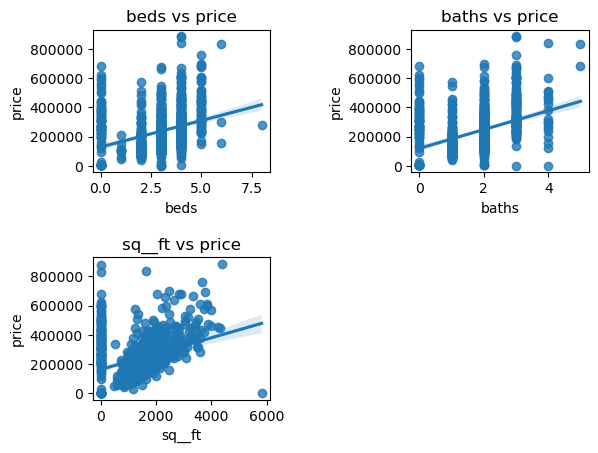

In [31]:
# ANSWER
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1) # nrows, ncols, index
    sns.regplot(x=col, y='price', data=df)
    plt.subplots_adjust(hspace=0.6)
    plt.subplots_adjust(wspace=0.8)
    plt.title(f'{col} vs price')

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [32]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [33]:
# Improve model by removing '0' values for sq_ft 
df = df[df.sq__ft != 0]
df[df.sq__ft == 0].value_counts().sum()

0

In [34]:
# ANSWER

# Model input needs to be in 2D
X = df[['sq__ft']] #or X = df['sq__ft'].values.reshape(-1,1)
y = df['price']

# Instantiate model
linreg = LinearRegression() 

# Fit/train model
linreg.fit(X, y) 

print(linreg.coef_, linreg.intercept_) 
#coef=slope: the larger the coef, the stronger the impact of this feature on the target variable 
#if coef is negative [positive], y is impacted negatively [positively]
#p-value on confidence of coef i.e. feature

[125.21648668] 30210.633866919146


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [35]:
# ANSWER
print(f'R_squared: {linreg.score(X, y)}')

R_squared: 0.4812307133326901


### 3. Splitting Data

In [36]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [37]:
# ANSWER
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [38]:
# ANSWER
# Check training/test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((545, 1), (269, 1), (545,), (269,))

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [39]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[123.99646679] 33320.16111883655


In [40]:
# ANSWER

print(f'R_squared value on:\nTest set: {linreg.score(X_test, y_test)}\nTraining set: {linreg.score(X_train, y_train)}')

R_squared value on:
Test set: 0.44917703281062393
Training set: 0.49300843934238503


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [41]:
# ANSWER
x = df.loc[df.street == '1140 EDMONTON DR', 'sq__ft'].values.reshape(-1,1) #or: x = [[1204]]
print(f'Square feet of house: {int(x)}')
print(x.shape)

y_pred = linreg.predict(x)
print(f'Predicted house price: ${int(np.round(y_pred)):,}')

Square feet of house: 1204
(1, 1)
Predicted house price: $182,612


C:\Users\stoll\anaconda3\envs\iod_py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Find the error

In [42]:
# Predict price from X_test
y_preds = linreg.predict(X_test)
y_preds[:5]

array([302268.49758545, 203939.29942131, 193399.59974419, 234690.42318513,
       208155.17929215])

In [43]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_preds, squared=True)
RMSE = mean_squared_error(y_test, y_preds, squared=False)

print(f'MSE: {int(np.round(MSE))}; RMSE: {int(np.round(RMSE))}')

MSE: 6873464362; RMSE: 82906


In [44]:
y_actual = df.loc[df.street == '1140 EDMONTON DR', 'price'].values.reshape(-1,1)

print(f'Acutal house price: ${int(y_actual):,}')
print(f'Difference between predicted and actual house price: ${int(abs(np.round(y_actual - y_pred)))}')
print(f'% Difference: {int(abs(np.round((y_actual - y_pred)/y_actual * 100))):,}%')

Acutal house price: $174,250
Difference between predicted and actual house price: $8362
% Difference: 5%




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



